<a href="https://colab.research.google.com/github/fredprada/Data_Science_Course_FredericoPrada/blob/main/Exerc%C3%ADcio_Pandas_Estrutura_(DataFrame).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np

In [2]:
series = pd.Series(np.arange(0,10,2))
series

0    0
1    2
2    4
3    6
4    8
dtype: int64

In [3]:
ser = pd.Series(data=series.values, index=['a', 'b', 'c','d','e'])
ser

a    0
b    2
c    4
d    6
e    8
dtype: int64

In [4]:
ser['c']

4

In [5]:
ser.dtype

dtype('int64')

In [6]:
print(ser.index)
print(ser.values)


Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
[0 2 4 6 8]


In [7]:
ser.iloc[-1]

8

In [8]:
ser.loc['e']

8

In [9]:
ser.shape

(5,)

<h3>DataFrame</h3>

In [10]:
df = pd.DataFrame({'idade':[43,30,21,43,21],'nome':['Fulano','Ciclano','Beltrano','Fulana','Ciclana']})
df.head()

,idade,nome
0,43,Fulano
1,30,Ciclano
2,21,Beltrano
3,43,Fulana
4,21,Ciclana


In [11]:
df.shape

(5, 2)

In [12]:
df.dtypes

idade     int64
nome     object
dtype: object

In [13]:
df.describe()

,idade
count,5.000000
mean,31.600000
std,11.036304
min,21.000000
25%,21.000000
50%,30.000000
75%,43.000000
max,43.000000


In [14]:
df[df['idade']==21]

,idade,nome
2,21,Beltrano
4,21,Ciclana


In [15]:
print(df.columns)
print(df.values)

Index(['idade', 'nome'], dtype='object')
[[43 'Fulano']
 [30 'Ciclano']
 [21 'Beltrano']
 [43 'Fulana']
 [21 'Ciclana']]


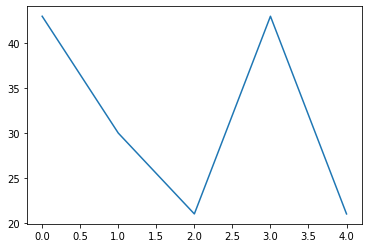

In [16]:
df['idade'].plot()

In [17]:
df.loc[0:2]

,idade,nome
0,43,Fulano
1,30,Ciclano
2,21,Beltrano


In [18]:
df.iloc[3:]

,idade,nome
3,43,Fulana
4,21,Ciclana


In [19]:
df.idade.sum()

158

In [20]:
df['nome'].value_counts()

Fulana      1
Beltrano    1
Fulano      1
Ciclana     1
Ciclano     1
Name: nome, dtype: int64

In [21]:
df['idade'].max()

43

In [22]:
df.isnull()

,idade,nome
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   idade   5 non-null      int64 
 1   nome    5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [24]:
df['idade'][df['idade']==21]=33
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,idade,nome
0,43,Fulano
1,30,Ciclano
2,33,Beltrano
3,43,Fulana
4,33,Ciclana


In [25]:
df.query('idade > 35')

,idade,nome
0,43,Fulano
3,43,Fulana


In [26]:
df.rename({'idade':'Idade'},inplace=True, axis='columns')
df.tail()

,Idade,nome
0,43,Fulano
1,30,Ciclano
2,33,Beltrano
3,43,Fulana
4,33,Ciclana


In [27]:
df.set_index('nome',inplace=True)
df.head()

,Idade
nome,
Fulano,43
Ciclano,30
Beltrano,33
Fulana,43
Ciclana,33


In [28]:
df.loc['Fulana']

Idade    43
Name: Fulana, dtype: int64

In [29]:
for a,b in zip(df.index,df.values):
  print(a,b)

Fulano [43]
Ciclano [30]
Beltrano [33]
Fulana [43]
Ciclana [33]


In [30]:
for a,b in zip(df.index,df.values):
  print(a,b[0])

Fulano 43
Ciclano 30
Beltrano 33
Fulana 43
Ciclana 33


In [31]:
df.dtypes

Idade    int64
dtype: object

<h3> Exercícios</b>

1. Crie um Data Frame com 10 linhas e colunas contendo nome, idade, cidade e cep.

In [70]:
import random
df = pd.DataFrame({'idade':[43,30,21,43,21,88,95,21,45,5],
                   'nome':['jim','john','beth','carl','jana','fred','bob','ana','eva','tom'],
                   'cidade':['aaa','bbb','bbb','ddd','bbb','fff','aaa','aaa','aaa','jjj'],
                   'altura':[2,3,5,3,2,3,2,1,2,5]})
df

,idade,nome,cidade,altura
0,43,jim,aaa,2
1,30,john,bbb,3
2,21,beth,bbb,5
3,43,carl,ddd,3
4,21,jana,bbb,2
5,88,fred,fff,3
6,95,bob,aaa,2
7,21,ana,aaa,1
8,45,eva,aaa,2
9,5,tom,jjj,5


2. Conte quantas pessoas vivem em cada cidade e qual é a média de idade das pessoas.

In [71]:
print(f'a média de idade é {df["idade"].mean()}')
print(df['cidade'].value_counts())

a média de idade é 41.2
aaa    4
bbb    3
fff    1
ddd    1
jjj    1
Name: cidade, dtype: int64


3. Calcule a média de idade das pessoas por cidade.

In [79]:
print(df.groupby('cidade').mean())

        idade    altura
cidade                 
aaa      51.0  1.750000
bbb      24.0  3.333333
ddd      43.0  3.000000
fff      88.0  3.000000
jjj       5.0  5.000000
